# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import os
import time
from time import strftime, localtime

#add directory/file location of api keys
# file = os.path.abspath('c:\\Users\\kcs34\\Desktop\\SRC\\API-KEYS\\key.json')

# # Import API key
# with open(file) as f:
#     k = json.load(f)
# api_key = k["OpenWeather"]

api_key = input("Enter your personal OpenWeather API Key: ")

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
### This section takes ~10 min. to finish due to the sleeps to keep from getting the OpenWeather API key locked out

base_url=("http://api.openweathermap.org/data/2.5/weather?APPID=" + api_key + "&units=Imperial&q=")

#data structure to hold retrieved data
data={"City":[],
      "Cloudiness":[],
      "Country":[],
      "Date":[],
      "Humidity":[],
      "Lat":[],
      "Lon":[],
      "Max Temp":[],
      "Wind Speed":[]}

#counter for log record number
counter=1

print("Beginning Data Retrirval")
print("-"*35)

for c in cities:
    rep = requests.get(base_url + c).json()
    #Check to see that actual data was retrieved from query
    if rep["cod"] != "404":
        print("Retrived data for city: {}, record number: {}".format(c,counter))
        #store retrieved data in a corrisponding lists 
        #City name,cloudiness,country,date(in epoch time),humidity,Latitude,lonitude,max_temp(f),wind speed
        data["City"].append(rep["name"])
        data["Cloudiness"].append(rep["clouds"]["all"])
        data["Country"].append(rep["sys"]["country"])
        data["Date"].append(rep["dt"])
        data["Humidity"].append(rep["main"]["humidity"])
        data["Lat"].append(rep["coord"]["lat"])
        data["Lon"].append(rep["coord"]["lon"])
        data["Max Temp"].append(rep["main"]["temp_max"])
        data["Wind Speed"].append(rep["wind"]["speed"])
        counter += 1
        #sleep for 1.05 seconds after each API call so as to not exceed the 60 calls per minute specified in the
        #OpenWeather docs
        time.sleep(1.05)
    else:
        print("City {} not found. Skipping...".format(c))
        #sleeping again, even a failed call is still a call
        time.sleep(1.05)
print("-"*35)
print("Finished Retriving Data")
print("-"*35)


Beginning Data Retrirval
-----------------------------------
Retrived data for city: grindavik, record number: 1
Retrived data for city: thompson, record number: 2
Retrived data for city: severo-kurilsk, record number: 3
Retrived data for city: longyearbyen, record number: 4
Retrived data for city: pevek, record number: 5
Retrived data for city: butaritari, record number: 6
Retrived data for city: umm kaddadah, record number: 7
Retrived data for city: mataura, record number: 8
Retrived data for city: punta arenas, record number: 9
Retrived data for city: vardo, record number: 10
City bengkulu not found. Skipping...
Retrived data for city: eyl, record number: 11
Retrived data for city: hermanus, record number: 12
Retrived data for city: saint-philippe, record number: 13
City bolungarvik not found. Skipping...
Retrived data for city: ushuaia, record number: 14
City phan rang not found. Skipping...
Retrived data for city: bluff, record number: 15
Retrived data for city: nerchinskiy zavod,

Retrived data for city: zhaotong, record number: 145
Retrived data for city: kupang, record number: 146
Retrived data for city: riberalta, record number: 147
Retrived data for city: nautla, record number: 148
Retrived data for city: kuytun, record number: 149
Retrived data for city: puerto ayora, record number: 150
Retrived data for city: san quintin, record number: 151
Retrived data for city: arraial do cabo, record number: 152
Retrived data for city: erenhot, record number: 153
City kaya not found. Skipping...
Retrived data for city: kendari, record number: 154
Retrived data for city: ozernovskiy, record number: 155
Retrived data for city: sao filipe, record number: 156
Retrived data for city: guilin, record number: 157
Retrived data for city: eureka, record number: 158
Retrived data for city: zharkent, record number: 159
Retrived data for city: shubarkuduk, record number: 160
Retrived data for city: campbellton, record number: 161
Retrived data for city: panguna, record number: 162


Retrived data for city: itarema, record number: 286
Retrived data for city: williston, record number: 287
Retrived data for city: batemans bay, record number: 288
Retrived data for city: kota kinabalu, record number: 289
Retrived data for city: hambantota, record number: 290
Retrived data for city: manaure, record number: 291
Retrived data for city: novobirilyussy, record number: 292
Retrived data for city: tugulym, record number: 293
Retrived data for city: salta, record number: 294
Retrived data for city: victoria, record number: 295
Retrived data for city: sehithwa, record number: 296
Retrived data for city: zhigansk, record number: 297
Retrived data for city: oranjestad, record number: 298
Retrived data for city: grand island, record number: 299
Retrived data for city: santo tomas, record number: 300
Retrived data for city: narrabri, record number: 301
Retrived data for city: nacozari, record number: 302
Retrived data for city: kefamenanu, record number: 303
Retrived data for city:

Retrived data for city: aksaray, record number: 429
Retrived data for city: westerland, record number: 430
Retrived data for city: vanavara, record number: 431
Retrived data for city: port keats, record number: 432
Retrived data for city: atasu, record number: 433
Retrived data for city: sirawai, record number: 434
City koprivnica not found. Skipping...
City da nang not found. Skipping...
Retrived data for city: karratha, record number: 435
City burica not found. Skipping...
Retrived data for city: teguldet, record number: 436
Retrived data for city: saravan, record number: 437
Retrived data for city: derzhavinsk, record number: 438
Retrived data for city: peniche, record number: 439
Retrived data for city: west bay, record number: 440
Retrived data for city: hamilton, record number: 441
Retrived data for city: ciudad bolivar, record number: 442
Retrived data for city: mahenge, record number: 443
Retrived data for city: sao joao da barra, record number: 444
Retrived data for city: codr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
fileName="Weather_data.csv"
weather_df = pd.DataFrame(data)
weather_df.to_csv(fileName,index=False)
weather_df.count()

City          534
Cloudiness    534
Country       534
Date          534
Humidity      534
Lat           534
Lon           534
Max Temp      534
Wind Speed    534
dtype: int64

In [5]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Grindavik,40,IS,1550802600,86,63.84,-22.43,42.80,19.46
1,Thompson,20,CA,1550800800,75,55.74,-97.86,-13.01,3.71
2,Severo-Kurilsk,64,RU,1550803489,100,50.68,156.12,26.00,9.08
3,Longyearbyen,90,NO,1550800200,89,78.22,15.63,32.00,35.57
4,Pevek,44,RU,1550803492,85,69.70,170.27,-14.23,3.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

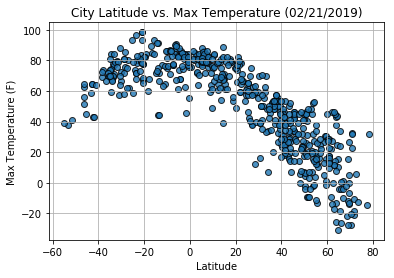

In [6]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolor="black",alpha=0.8)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature ({})".format(strftime("%m/%d/%Y",localtime())))
plt.savefig("City_Lat_vs_Max_Temp.png")

#### Latitude vs. Humidity Plot

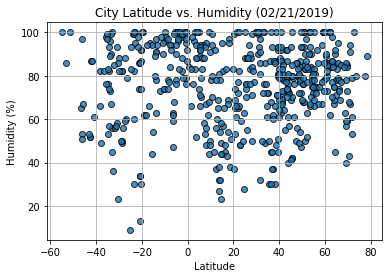

In [7]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolor="black",alpha=0.8)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity ({})".format(strftime("%m/%d/%Y",localtime())))
plt.savefig("City_Lat_vs_Humidity.png")

#### Latitude vs. Cloudiness Plot

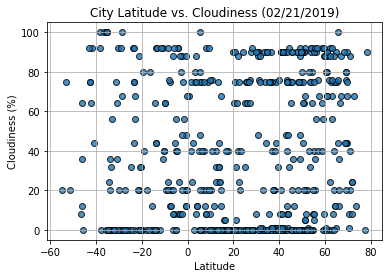

In [8]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolor="black",alpha=0.8)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness ({})".format(strftime("%m/%d/%Y",localtime())))
plt.savefig("City_Lat_vs_Cloudiness.png")

#### Latitude vs. Wind Speed Plot

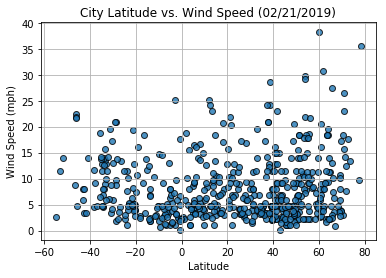

In [9]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolor="black",alpha=0.8)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed ({})".format(strftime("%m/%d/%Y",localtime())))
plt.savefig("City_Lat_vs_Wind_Speed.png")

# Data Musings

 1. There appears to be no observable correlation between clousiness and latitude.
 2. As might be expected temperature increases at the equator and tapers off as you approach either pole
 3. Wind speed appears to be fairly evenly distributed regardless of latitude.